# **Importing Files**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/train.csv')
test = pd.read_csv('/kaggle/input/test.csv')
submission = pd.DataFrame()
submission['Loan_ID'] = test['Loan_ID']

In [3]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [4]:
train.shape, test.shape

((164309, 14), (109541, 13))

In [5]:
combine = train.append(test)
combine.shape

(273850, 14)

In [6]:
combine.isnull().sum()

Loan_ID                         0
Loan_Amount_Requested           0
Length_Employed             12307
Home_Owner                  42060
Annual_Income               42000
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency    147238
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

In [7]:
combine.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1.0
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3.0
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3.0
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3.0
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1.0


# **Data Cleaning**

In [8]:
dict_employed={'< 1 year':0, '4 years':4, '7 years':7, '8 years':8, '2 years':2,
       '10+ years':11, '1 year':1, '6 years':6, '9 years':9, '3 years':3,
       '5 years':5}
combine['Length_Employed']=combine['Length_Employed'].map(dict_employed)
combine['Length_Employed'].fillna(combine['Length_Employed'].median(),inplace=True)
combine['Length_Employed']=combine['Length_Employed'].astype(int)

In [9]:
combine['Home_Owner'].fillna('Unknown',inplace=True)

In [10]:
combine['Annual_Income'].fillna(combine['Annual_Income'].mean(),inplace=True)
combine['Annual_Income']=np.log(combine['Annual_Income'])

In [11]:
combine['Income_Verified']=combine['Income_Verified'].replace('VERIFIED - income source','VERIFIED - income')

In [12]:
combine['Loan_Amount_Requested']=combine['Loan_Amount_Requested'].str.replace(',','')
combine['Loan_Amount_Requested']=combine['Loan_Amount_Requested'].astype(int)
combine['Loan_Amount_Requested']=np.log(combine['Loan_Amount_Requested'])

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
combine['Home_Owner']=le.fit_transform(combine['Home_Owner'])
combine['Income_Verified']=le.fit_transform(combine['Income_Verified'])
combine['Purpose_Of_Loan']=le.fit_transform(combine['Purpose_Of_Loan'])
combine['Gender']=le.fit_transform(combine['Gender'])

In [14]:
combine['Months_Since_Deliquency'].fillna(combine['Months_Since_Deliquency'].mean(),inplace=True)
combine['Months_Since_Deliquency']=np.log(combine['Months_Since_Deliquency'])

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
combine.drop(['Loan_ID'],axis=1,inplace=True)

In [16]:
combine.isnull().sum()

Loan_Amount_Requested           0
Length_Employed                 0
Home_Owner                      0
Annual_Income                   0
Income_Verified                 0
Purpose_Of_Loan                 0
Debt_To_Income                  0
Inquiries_Last_6Mo              0
Months_Since_Deliquency         0
Number_Open_Accounts            0
Total_Accounts                  0
Gender                          0
Interest_Rate              109541
dtype: int64

In [17]:
combine.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,8.853665,0,4,11.127263,1,0,18.37,0,3.529397,9,14,0,1.0
1,10.308953,4,0,11.203581,0,2,14.93,0,2.833213,12,24,0,3.0
2,10.115570,7,0,11.232767,0,2,15.88,0,3.529397,12,16,1,3.0
3,9.680344,0,5,10.935960,0,2,14.34,3,3.529397,16,22,1,3.0
4,9.740969,8,3,11.472103,0,2,22.17,1,3.529397,19,30,0,1.0


In [18]:
X = combine[combine['Interest_Rate'].isnull()!=True]
y = combine[combine['Interest_Rate'].isnull()!=True]['Interest_Rate']

test = combine[combine['Interest_Rate'].isnull()==True]

X.shape, y.shape, test.shape

((164309, 13), (164309,), (109541, 13))

In [19]:
X.drop('Interest_Rate',axis=1,inplace=True)
test.drop('Interest_Rate',axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# **Splitting the Dataset into train and test**

In [20]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.06,random_state=0)

# ****LightGBM Classifier****

In [21]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
model = LGBMClassifier(max_depth=5,
                       learning_rate=0.4, 
                       n_estimators=1000,
                       objective="multiclass")

model.fit(X_train,y_train,
          eval_set=[(X_train,y_train),(X_test, y_test)],
          early_stopping_rounds=100,
          verbose=200)
          
y_pred=model.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

Training until validation scores don't improve for 100 rounds
[200]	training's multi_logloss: 0.846841	valid_1's multi_logloss: 0.915628
Early stopping, best iteration is:
[107]	training's multi_logloss: 0.874964	valid_1's multi_logloss: 0.912275


0.5378587999330171

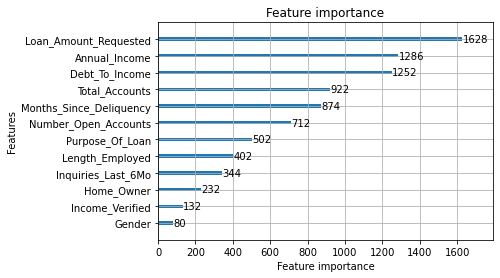

In [22]:
import lightgbm
lightgbm.plot_importance(model)

In [23]:
y_pred=model.predict(test)

In [24]:
submission['Interest_Rate']=y_pred

In [25]:
submission.head()

,Loan_ID,Interest_Rate
0,10164310,2.0
1,10164311,1.0
2,10164312,2.0
3,10164313,2.0
4,10164314,2.0


In [26]:
submission.to_csv('lightgbm_test_06.csv',index=False)